In [2]:

! pip install numpy
! pip install matplotlib
! pip install seaborn


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
import os
file_path = os.path.join(os.getcwd(),"data","Fertilizer Prediction.csv")
df = pd.read_csv(file_path)
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [5]:
df.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [6]:
df.shape

(99, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [8]:
df.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [9]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
94    False
95    False
96    False
97    False
98    False
Length: 99, dtype: bool

In [10]:
Columns = list(df.columns)
Columns

['Temparature',
 'Humidity ',
 'Moisture',
 'Soil Type',
 'Crop Type',
 'Nitrogen',
 'Potassium',
 'Phosphorous',
 'Fertilizer Name']

In [11]:
num_cols = [col for col in Columns if df[col].dtype != 'O']
cat_cols = [col for col in Columns if df[col].dtype == "O"]
num_cols, cat_cols

(['Temparature',
  'Humidity ',
  'Moisture',
  'Nitrogen',
  'Potassium',
  'Phosphorous'],
 ['Soil Type', 'Crop Type', 'Fertilizer Name'])

In [12]:
df[num_cols].head()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
0,26,52,38,37,0,0
1,29,52,45,12,0,36
2,34,65,62,7,9,30
3,32,62,34,22,0,20
4,28,54,46,35,0,0


<Axes: >

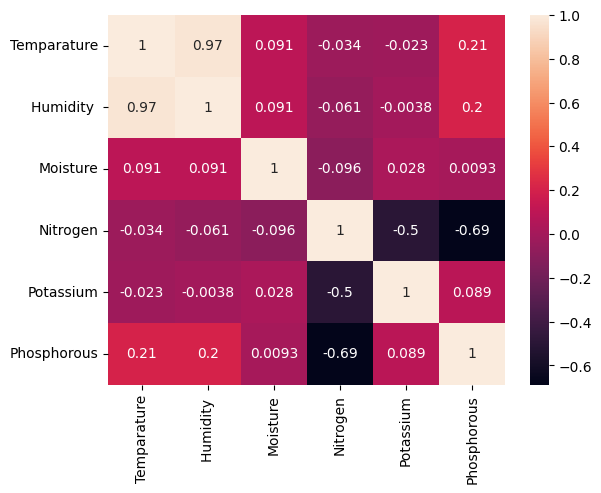

In [13]:
sns.heatmap(df[num_cols].corr(method = 'pearson'),annot = True)

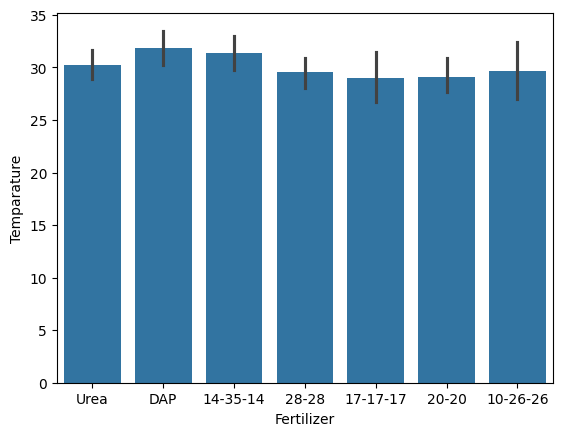

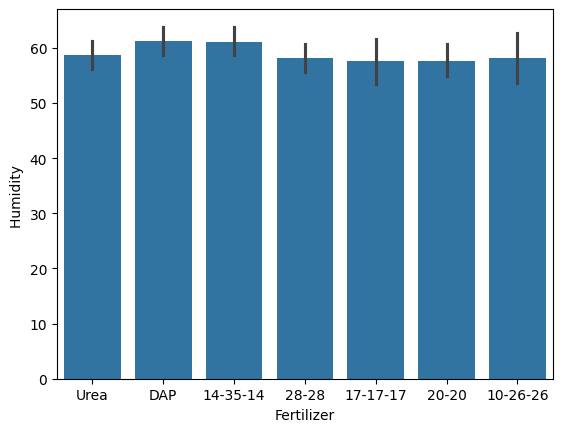

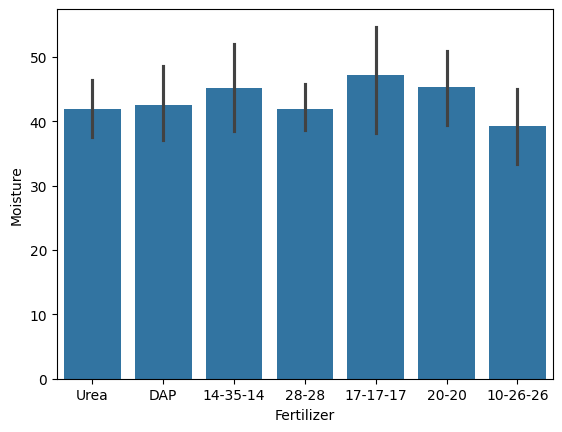

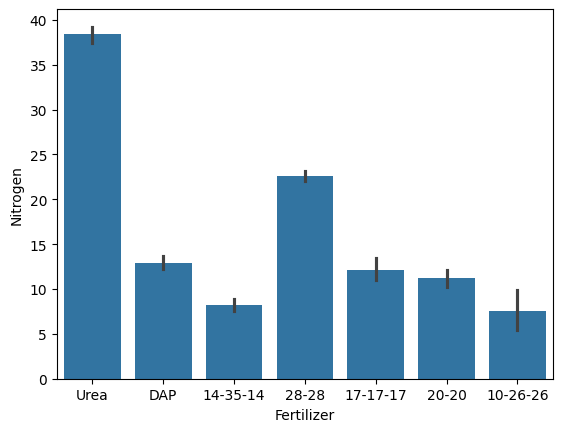

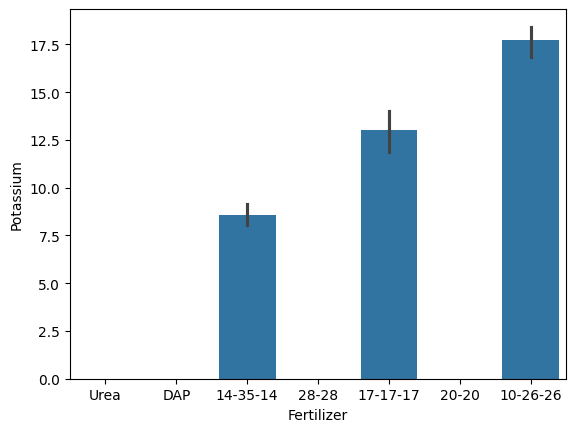

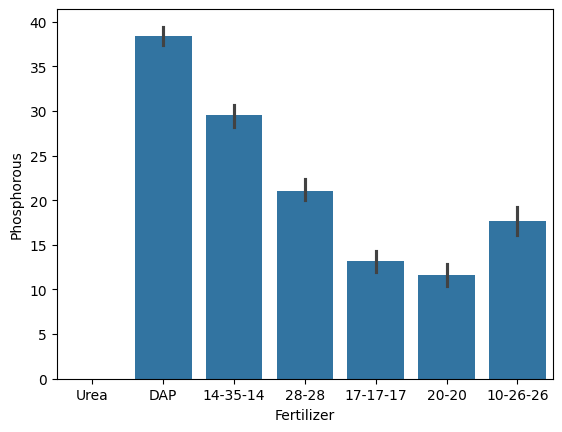

In [14]:
for i in num_cols:
    plt.xlabel("Fertilizer")
    plt.ylabel(i)
    sns.barplot(x = df['Fertilizer Name'],y = df[i])
    plt.show()

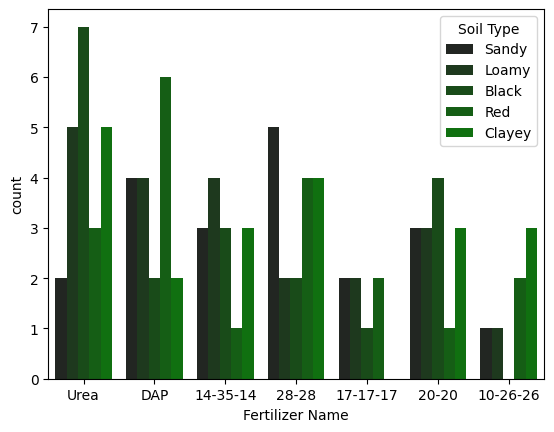

In [15]:
sns.countplot(x = df['Fertilizer Name'],hue = df['Soil Type'],color='green')
plt.show()

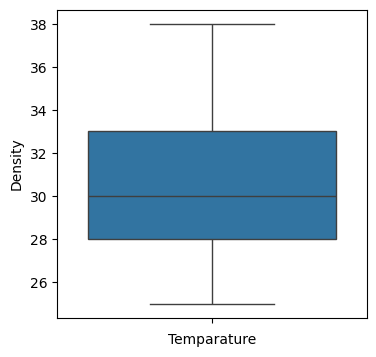

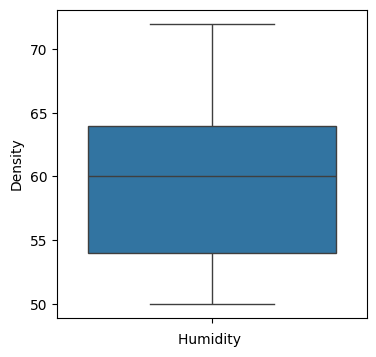

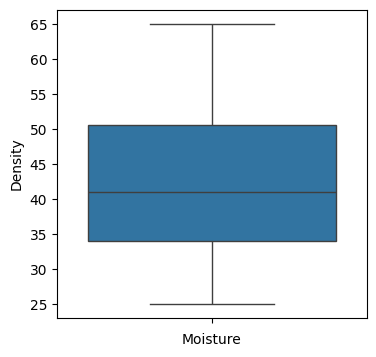

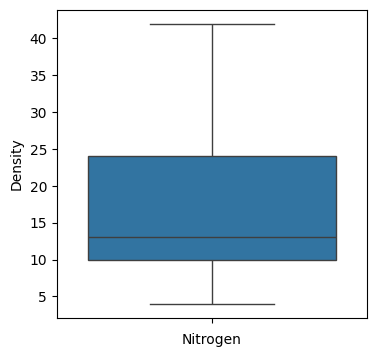

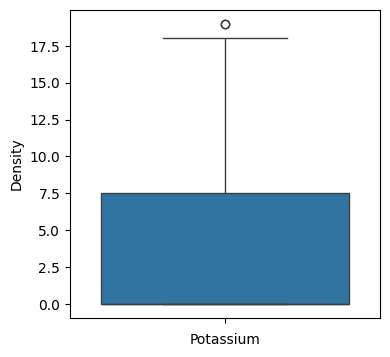

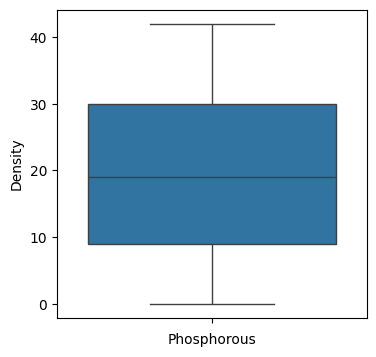

In [16]:
for i in num_cols:
    plt.figure(figsize=(4,4))
    plt.xlabel(i)
    plt.ylabel("Density")
    sns.boxplot(df[i])
    plt.show()